# PINT Example Session (5 Feb 2015)

The PINT "homepage":  https://github.com/nanograv/PINT

PINT will normally be run via a script, or for "work", via a command line session like ipython

## Times of Arrival (TOAs)

Read in some TOAs.

Note:  The first time that things get read in, lots of processing (can) happen.  Can take a few seconds.  But a "pickle" file is saved, so the next import (if nothing changed), things are much faster (typically ~1 second)

In [1]:
import pint.toa as toa
t = toa.get_TOAs("NGC6440E.tim",usepickle=False)

INFO: Applying clock corrections. [pint.toa]
INFO: Getting IERS params and computing TDBs. [pint.toa]
INFO: Computing observatory positions and velocities. [pint.toa]


In [2]:
t.print_summary()

Number of TOAs:  62
Number of commands:  1
Number of observatories:  1 ['gbt']
gbt TOAs (62):
  Min error:     13.2 us
  Max error:     118 us
  Mean error:    26.9 us
  Median error:  22.1 us
  Error stddev:  15.6 us



In [3]:
t.get_mjds()[0]

53478.285871419219

Vast majority of the information is in an [Astropy Table](http://astropy.readthedocs.org/en/latest/table/):

In [4]:
t.table.colnames

['index',
 'mjd',
 'mjd_float',
 'error',
 'freq',
 'obs',
 'flags',
 'tdb',
 'tdbld',
 'ssb_obs_pos',
 'ssb_obs_vel',
 'obs_sun_pos']

Lots of cool things that tables can do...

In [5]:
tt = t.table
tt.show_in_browser()

Can do fancy sorting, selecting, re-arranging very easily.

In [6]:
select = tt['error'] < 20
print(select)

[False False False False False False False  True False False False False
 False False  True False  True False False False  True False  True False
  True  True  True  True False  True False  True  True  True False False
 False False False False False False  True  True False  True  True False
 False False  True False False False False False False False False False
 False False]


In [7]:
tt['tdb'][select]

53679.876388
53690.851265
53695.8596507
53709.8103552
53740.7753531
53801.5921875
53833.2985648
53833.5032122
53843.3328338
53865.3767058
53895.3242239


Many PINT routines / classes / functions use [Astropy Units](http://astropy.readthedocs.org/en/latest/units/) internally or externally:

In [8]:
import astropy.units as u
t.get_errors() < 20 * u.ns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False], dtype=bool)

The times in each row contain (or are derived from) [Astropy Time](http://astropy.readthedocs.org/en/latest/time/) objects:

In [9]:
t0 = tt['mjd'][0]

In [10]:
t0.tai

<Time object: scale='tai' format='pulsar_mjd' value=53478.2862418>

But the most useful timescale, TDB (and maybe soon others) are also stored as long double (i.e. "float96") Numpy arrays:

In [11]:
tt['tdbld'][:3]

53478.2866143
53483.2774481
53489.4691327


## Timing (or other) Models

Now let's define and load a timing model

In [13]:
import pint.models as models
m = models.StandardTimingModel()
m.read_parfile("NGC6440E.par")

In [14]:
print(m.as_parfile())

PSR                            1748-2021E
PLANET_SHAPIRO                          N
DM                                  223.9 1 0.0
F0                  61.485476554000000001 1 0.0
F1                             -1.181e-15 1 0.0
TZRMJD              53801.386051182230000
PEPOCH              53750.000000000000000
POSEPOCH            53750.000000000000000
PX                                    0.0
RAJ                     17:48:52.75000000 1 0.0
DECJ                   -20:21:29.00000000 1 0.0
PMRA                                  0.0
PMDEC                                 0.0
UNITS TDB



Timing models are basically composed of "delay" terms and "phase" terms:

In [15]:
m.delay_funcs

{'L1': [<bound method StandardTimingModel.solar_system_shapiro_delay of <pint.models.timing_model.StandardTimingModel object at 0x11147f390>>,
  <bound method StandardTimingModel.dispersion_delay of <pint.models.timing_model.StandardTimingModel object at 0x11147f390>>,
  <bound method StandardTimingModel.solar_system_geometric_delay of <pint.models.timing_model.StandardTimingModel object at 0x11147f390>>],
 'L2': []}

In [16]:
m.phase_funcs

[<bound method StandardTimingModel.spindown_phase of <pint.models.timing_model.StandardTimingModel object at 0x11147f390>>]

Can easily show/compute individual terms...

In [17]:
ds = m.solar_system_shapiro_delay(tt)
print(ds)

[ -4.11774615e-06  -4.58215733e-06  -5.09435414e-06   1.26025166e-05
   1.26025164e-05   1.26025162e-05   1.26025160e-05   1.26025163e-05
   1.34033282e-05   1.35163226e-05   1.43416919e-05   1.53159181e-05
   1.63198995e-05   1.64587639e-05   1.80783671e-05   2.11530227e-05
   2.12647452e-05   2.49851393e-05   2.51080759e-05   3.45107578e-05
   3.47450145e-05   3.00319035e-05   2.98083009e-05   2.11804876e-06
   2.07541049e-06  -3.00762925e-06  -3.03173087e-06  -4.09655364e-06
  -5.80849733e-06  -5.81983363e-06  -6.90339229e-06  -6.90646307e-06
  -6.82672804e-06  -6.82292820e-06  -5.19141699e-06  -5.17650522e-06
  -2.63564143e-06  -2.60880558e-06   2.28385789e-06   2.32788086e-06
   1.51692739e-05   1.52882687e-05   5.13321681e-05   4.61456319e-05
   3.99876478e-05   3.82020218e-05   6.59654821e-06   6.09155453e-06
   5.78124973e-06   5.45386907e-06   5.22873336e-06   3.47897242e-06
  -1.52400083e-06  -1.56079046e-06   3.82020202e-05   3.82020207e-05
   3.82020212e-05   3.82020216e-05

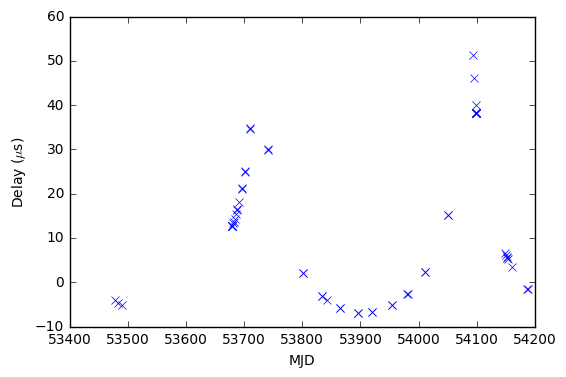

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t.get_mjds(high_precision=False), ds*1e6, 'x')
plt.xlabel("MJD") ; plt.ylabel("Delay ($\mu$s)")

or all of the terms added together:

In [19]:
m.delay(tt)

array([-256.27780385, -292.17727414, -333.75096918,  357.15222973,
        357.1042449 ,  357.06652485,  357.03633769,  357.08429711,
        367.69388946,  369.13838938,  379.080215  ,  389.80455011,
        399.7984286 ,  401.11641314,  415.02787367,  435.89826732,
        436.54658382,  454.24106089,  454.72545487,  478.04207903,
        478.38385956,  468.46407862,  467.91561351,   94.36851725,
         92.62907224, -175.81784133, -177.46527042, -253.52910298,
       -394.21626284, -395.23691322, -497.24000468, -497.5402638 ,
       -488.57105536, -488.1777565 , -337.19429477, -335.9154623 ,
       -146.57383909, -144.8059907 ,  105.78805672,  107.5422893 ,
        389.24590076,  390.51827027,  490.40921287,  488.47335247,
        484.41365305,  482.68741688,  240.08987512,  226.85717062,
        218.50192024,  209.24145601,  202.56740376,  146.32214659,
        -81.97888773,  -84.14610449,  482.769396  ,  482.74220183,
        482.7182698 ,  482.69709825,  482.67827842,  482.66147

In [20]:
m.phase(tt)

Phase(int=<Column name='tdbld' dtype='float128' length=62>
-1716399977.0
-1689884738.0
-1656989816.0
 -645523228.0
 -645523228.0
 -645523228.0
 -645523228.0
 -645523228.0
 -635828288.0
 -634480136.0
 -625012858.0
 -614385261.0
          ...
 1870800485.0
 1907853722.0
 2050284934.0
 2051643650.0
 1584772976.0
 1584772976.0
 1584772976.0
 1584772976.0
 1584772976.0
 1584772976.0
 1584772976.0
 1584772976.0, frac=<Column name='tdbld' dtype='float128' length=62>
-0.237274569692
-0.242192612495
-0.251325660618
 -0.40286661312
-0.403336402727
-0.409660983132
-0.409793278086
-0.406678973814
-0.403616642288
-0.400443591818
-0.400912318379
-0.398421790334
            ...
-0.249791253242
-0.250959916972
-0.248341697967
-0.246403519297
 -0.31841547729
 -0.32175750006
 -0.32510541915
-0.323977592518
-0.326480522519
-0.320932670846
-0.331370422035
-0.325499267899)

## Residuals

In [21]:
import pint.residuals as r

In [22]:
rs = r.resids(t, m).phase_resids

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/astropy/table/column.py:263: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return self.data.__eq__(other)


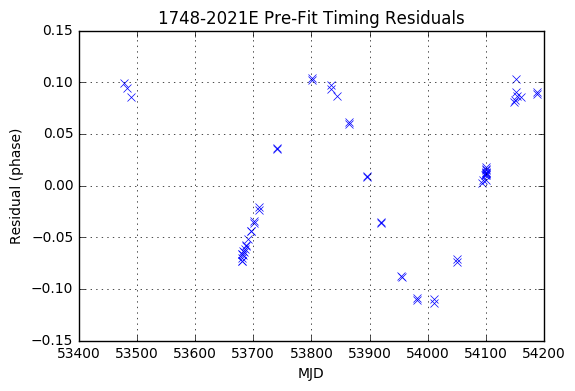

In [23]:
plt.plot(t.get_mjds(high_precision=False), rs, 'x')
plt.title("%s Pre-Fit Timing Residuals" % m.PSR.value)
plt.xlabel('MJD'); plt.ylabel('Residual (phase)')
plt.grid()


## Fitting and Post-Fit residuals

The fitter is *completely* separate from the model and the TOA code.  So you can use any type of fitter with some easy coding.  This example uses a very simple Powell minimizer from the SciPy optimize module. 

In [24]:
import pint.fitter as fit
f = fit.fitter(t, m)
f.call_minimize()

In [25]:
print "Best fit has reduced chi^2 of", f.resids.chi2_reduced
print "RMS in phase is", f.resids.phase_resids.std()
print "RMS in time is", f.resids.time_resids.std().to(u.us)
print "\n Best model is:"
print f.model.as_parfile()


Best fit has reduced chi^2 of 1.04891024458
RMS in phase is 0.00204342567823
RMS in time is 33.2342821873 us

 Best model is:
PSR                            1748-2021E
PLANET_SHAPIRO                          N
DM                          224.116567383 1 0.0
F0                  61.485476554369022099 1 0.0
F1                             -1.181e-15 1 0.0
TZRMJD              53801.386051182230000
PEPOCH              53750.000000000000000
POSEPOCH            53750.000000000000000
PX                                    0.0
RAJ                     17:48:52.80035321 1 0.0
DECJ                   -20:21:29.38781031 1 0.0
PMRA                                  0.0
PMDEC                                 0.0
UNITS TDB



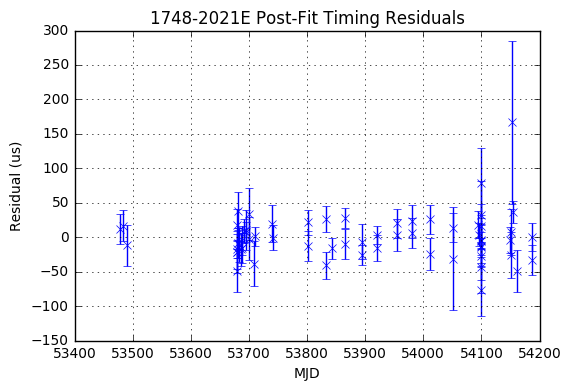

In [26]:
plt.errorbar(t.get_mjds(high_precision=False),
             f.resids.time_resids.to(u.us).value,
             t.get_errors().to(u.us).value, fmt='x')
plt.title("%s Post-Fit Timing Residuals" % m.PSR.value)
plt.xlabel('MJD'); plt.ylabel('Residual (us)')
plt.grid()

## Other interesting things

We can make Barycentered TOAs in a single line!

In [27]:
m.get_barycentric_toas(tt)

<Quantity [ 53478.29, 53483.281, 53489.473, 53679.872, 53679.872,
            53679.872, 53679.872, 53679.872, 53681.697, 53681.951,
            53683.733, 53685.734, 53687.683, 53687.946, 53690.846,
            53695.691, 53695.855, 53700.715, 53700.862, 53709.633,
            53709.805, 53740.563, 53740.77, 53801.386, 53801.591,
            53833.301, 53833.505, 53843.336, 53865.19, 53865.381,
            53895.119, 53895.33, 53920.059, 53920.246, 53954.977,
            53955.179, 53980.905, 53981.122, 54010.821, 54011.031,
            54050.701, 54050.942, 54093.652, 54095.648, 54098.66,
            54099.705, 54148.684, 54150.423, 54151.525, 54152.716,
            54153.547, 54160.522, 54187.333, 54187.589, 54099.705,
            54099.705, 54099.705, 54099.705, 54099.705, 54099.705,
            54099.705, 54099.705] d>